# =============================================================
# MILESTONE 1: Data Collection, Exploration, and Preprocessing
# =============================================================

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import os

In [37]:
# Set plotting style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# ========================
# 1. DATA COLLECTION
# ========================

In [38]:
url = "https://raw.githubusercontent.com/Reemsoliiman/customer-churn-prediction-analysis/main/data/processed/merged_churn_data.csv"
df = pd.read_csv(url)
print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")


Dataset loaded: 3333 rows, 20 columns


In [39]:
df_before = df.copy()

# ========================
# 2. INITIAL DATA EXPLORATION
# ========================

In [40]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [42]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [43]:
print(df.duplicated().sum())

0


In [44]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [45]:
df['Churn'].value_counts()

Churn
False    2850
True      483
Name: count, dtype: int64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16252\3219302036.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


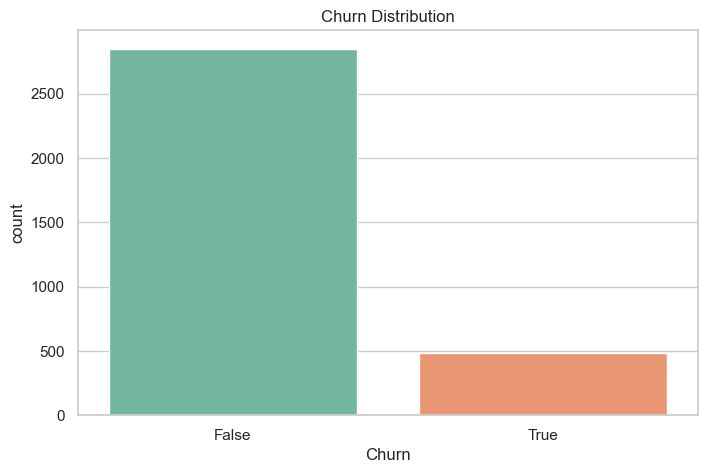

In [46]:
# Churn Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Churn Distribution')
plt.savefig(f'../visualizations/enhanced/churn_distribution.png')
plt.show()

# ========================
# 3. DATA CLEANING & PREPROCESSING
# ========================

# -------------------------------------
# 3.1 Remove Duplicates
# -------------------------------------

In [47]:
if df.duplicated().sum() > 0:
    df = df.drop_duplicates().reset_index(drop=True)
    print(f"Removed {df.duplicated().sum()} duplicates")
else:
    print("No duplicates found")

No duplicates found


# -------------------------------------
# 3.2 Handle Missing Values
# -------------------------------------

In [48]:
if df.isnull().sum().sum() > 0:
    print("Missing values found")
else:
    print("No missing values found")

No missing values found


In [49]:
# Handle missing values by imputation (example: fill with median)
for column in df.select_dtypes(include=[np.number]).columns:
    df[column].fillna(df[column].median(), inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16252\843874314.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


# -------------------------------------
# 3.3 Outlier Detection & Clipping
# -------------------------------------

In [50]:
charge_columns = ['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']
df = df.drop(columns=[col for col in charge_columns if col in df.columns])
print(f"Dropped charge-related columns: {charge_columns}")

Dropped charge-related columns: ['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']


In [51]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

In [52]:
outlier_counts = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers before clipping
    outlier_mask_col = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_counts[col] = outlier_mask_col.sum()
    
    # Clip values in the original dataframe
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

print("Outliers detected before clipping:")
for col, count in outlier_counts.items():
    print(f"  {col}: {count} outliers")
print("Outliers clipped to IQR bounds")

Outliers detected before clipping:
  Account length: 18 outliers
  Area code: 0 outliers
  Number vmail messages: 1 outliers
  Total day minutes: 25 outliers
  Total day calls: 23 outliers
  Total eve minutes: 24 outliers
  Total eve calls: 20 outliers
  Total night minutes: 30 outliers
  Total night calls: 22 outliers
  Total intl minutes: 46 outliers
  Total intl calls: 78 outliers
  Customer service calls: 267 outliers
Outliers clipped to IQR bounds


In [53]:
Q1_all = df_before[numeric_cols].quantile(0.25)  
Q3_all = df_before[numeric_cols].quantile(0.75)
IQR_all = Q3_all - Q1_all

mask_no_outliers = ~((df_before[numeric_cols] < (Q1_all - 1.5 * IQR_all)) | 
                     (df_before[numeric_cols] > (Q3_all + 1.5 * IQR_all))).any(axis=1)

df_no_outliers = df_before[mask_no_outliers]

In [54]:
df.to_csv('../data/interim/imputed_data.csv', index=False)
df_no_outliers.to_csv('../data/interim/outlier_removed_data.csv', index=False)
print(f"Interim files saved: imputed_data.csv and outlier_removed_data.csv")

Interim files saved: imputed_data.csv and outlier_removed_data.csv


# -------------------------------------
# 3.4 Feature Engineering
# -------------------------------------

In [55]:
# Create a binary feature for high customer service calls 
df['High_Customer_Service'] = (df['Customer service calls'] > 3).astype(int)

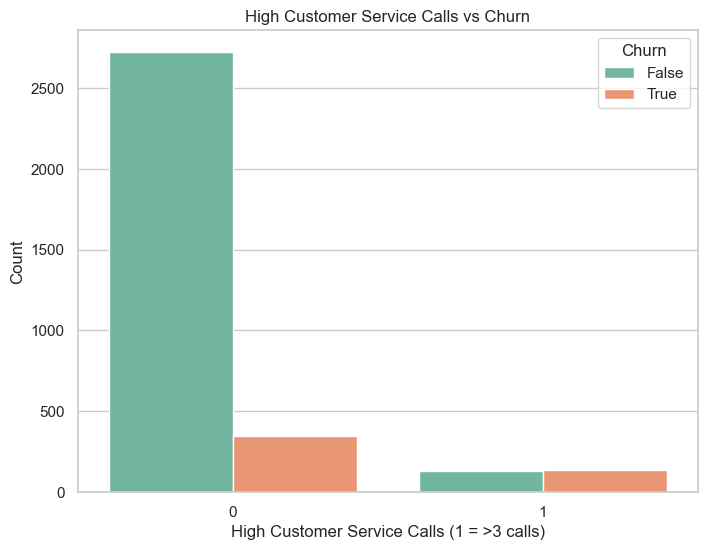

In [56]:
# Visualize the distribution of the engineered feature
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='High_Customer_Service', hue='Churn', palette='Set2')
plt.title('High Customer Service Calls vs Churn')
plt.xlabel('High Customer Service Calls (1 = >3 calls)')
plt.ylabel('Count')
plt.savefig(f'../visualizations/enhanced/high_customer_service_distribution.png')
plt.show()

# -------------------------------------
# 3.5 Encode Target & Categoricals
# -------------------------------------

In [57]:
# Convert Churn (boolean) to 0/1
df['Churn'] = df['Churn'].astype(int)
print("Churn converted to 0/1")

Churn converted to 0/1


In [58]:
# Convert Area code to string for categorical encoding
df['Area code'] = df['Area code'].astype(str)

In [59]:
# One-hot encode categorical columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print(f"One-hot encoded {len(categorical_cols)} categorical columns")
print(f"Final dataset shape: {df_encoded.shape}")

One-hot encoded 4 categorical columns
Final dataset shape: (3333, 67)


In [60]:
# Save cleaned dataset
df_encoded.to_csv('../data/interim/initial_cleaned_data.csv', index=False)
print(f"Initial cleaned dataset saved with {df_no_outliers.shape[0]} rows")

Initial cleaned dataset saved with 2807 rows


# ========================
# 4. EXPLORATORY DATA ANALYSIS (VISUALIZATIONS)
# ========================

In [61]:
numeric_cols = df_encoded.select_dtypes(include=[np.number]).columns.drop(['Churn']).tolist()

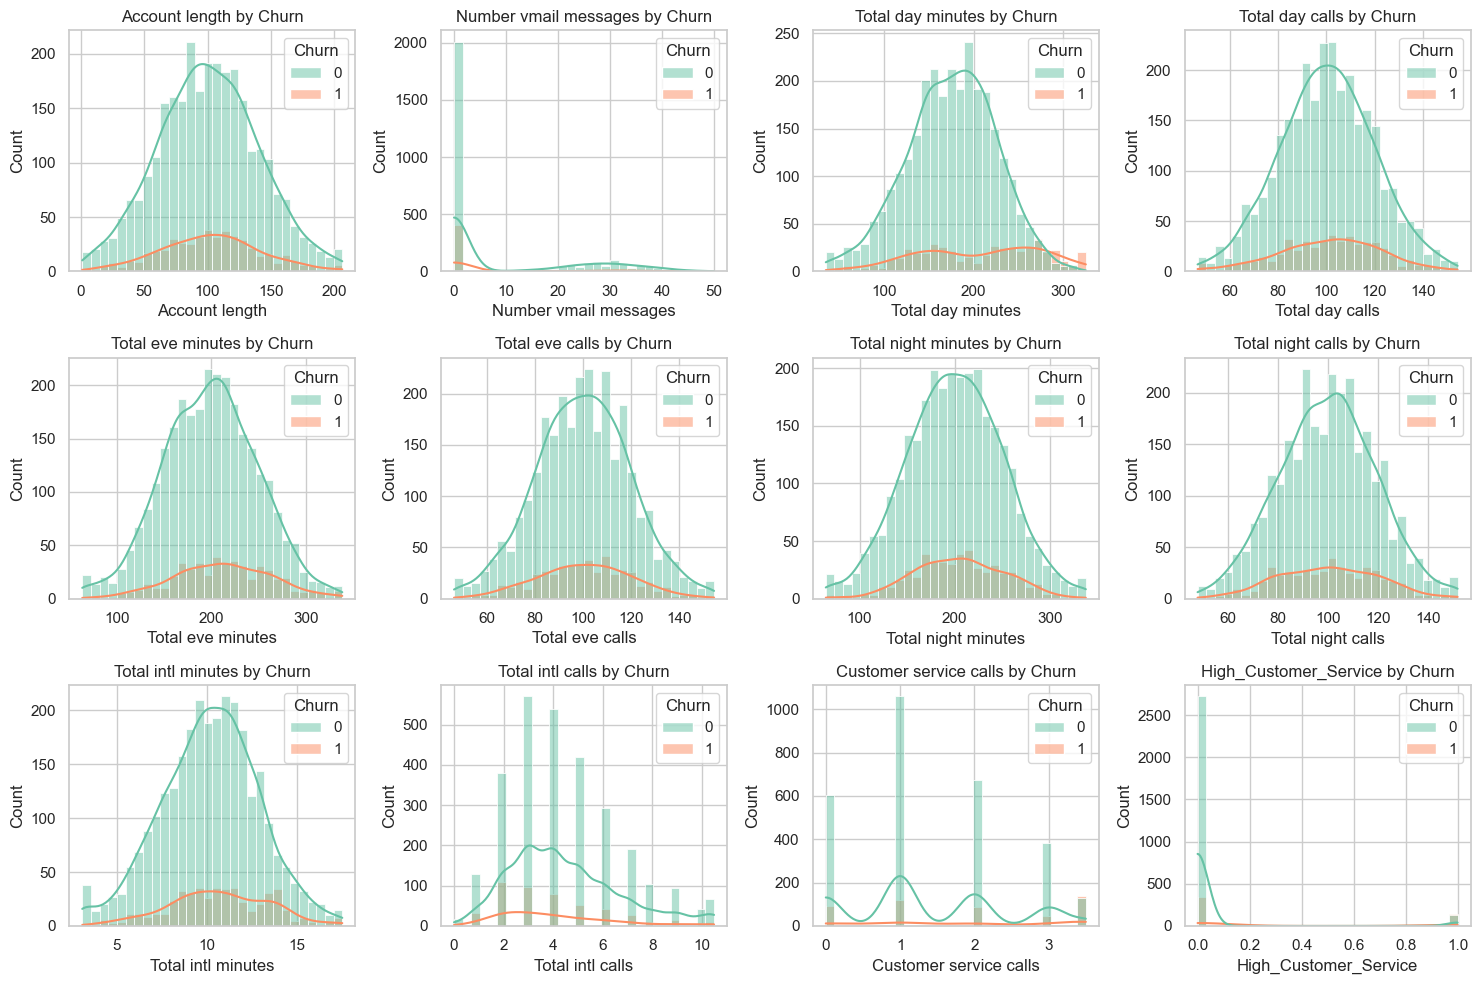

In [62]:
# 1. Histograms for Numerical Columns by Churn
plt.figure(figsize=(15, 10))
n_cols = 4 
n_rows = int(np.ceil(len(numeric_cols) / n_cols))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=df, x=col, hue='Churn', kde=True, bins=30, palette='Set2', alpha=0.5)
    plt.title(f'{col} by Churn')
plt.tight_layout()
plt.savefig(f'../visualizations/enhanced/numerical_columns_by_churn.png')
plt.show()

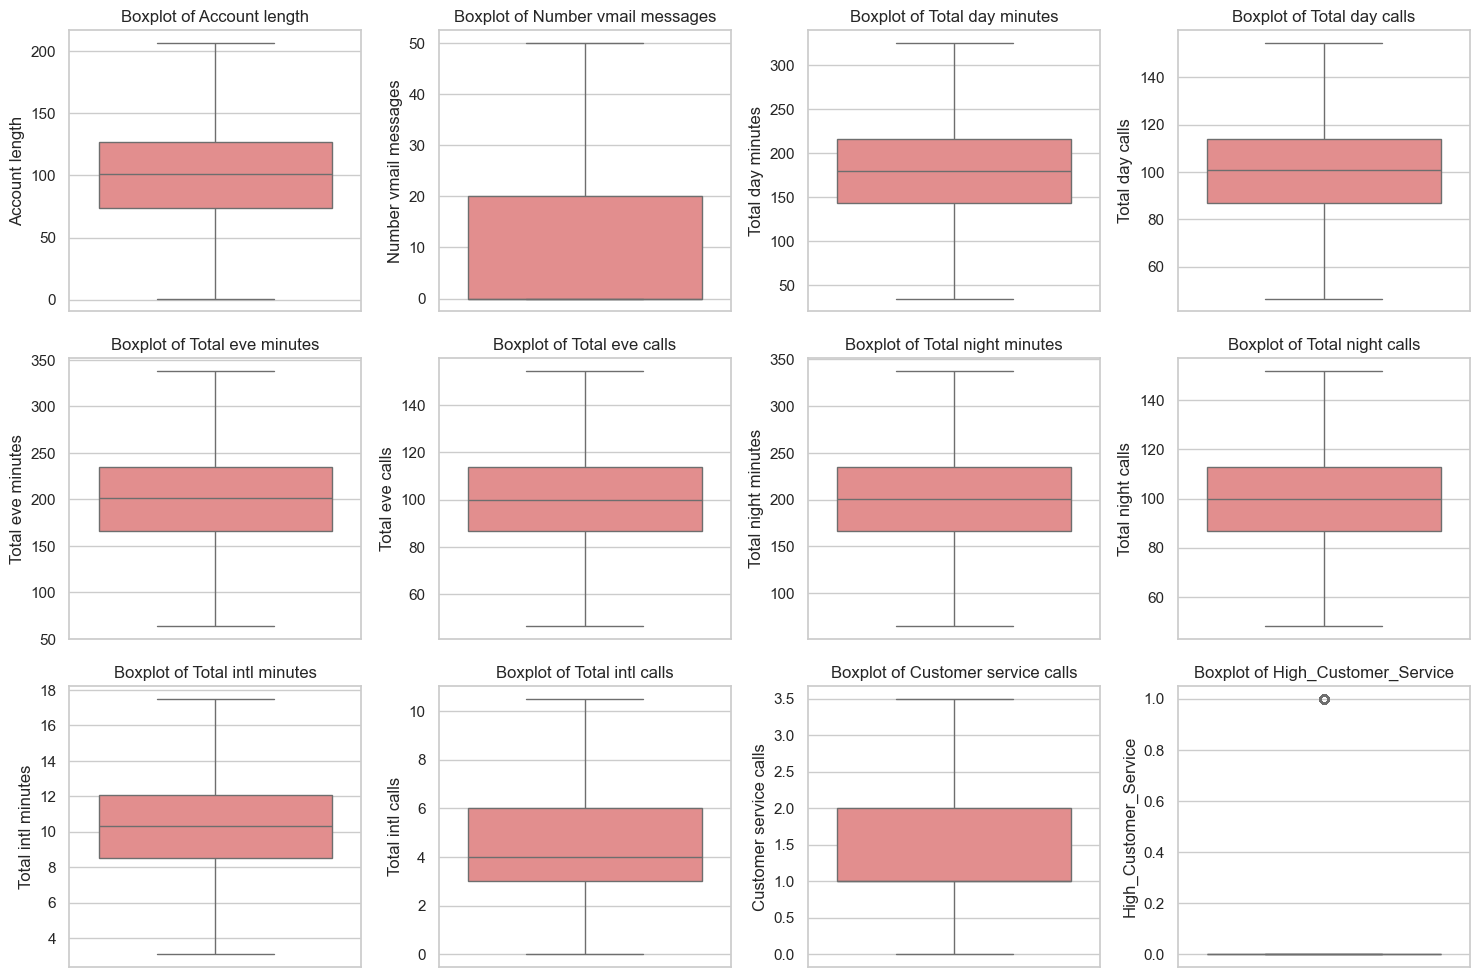

In [63]:
# 2. Boxplots for Numerical Columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.savefig(f'../visualizations/enhanced/boxplots_for_numerical_columns.png')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16252\2509324805.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set2')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16252\2509324805.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set2')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16252\2509324805.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set2')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16252\2509324805.py:5: FutureWa

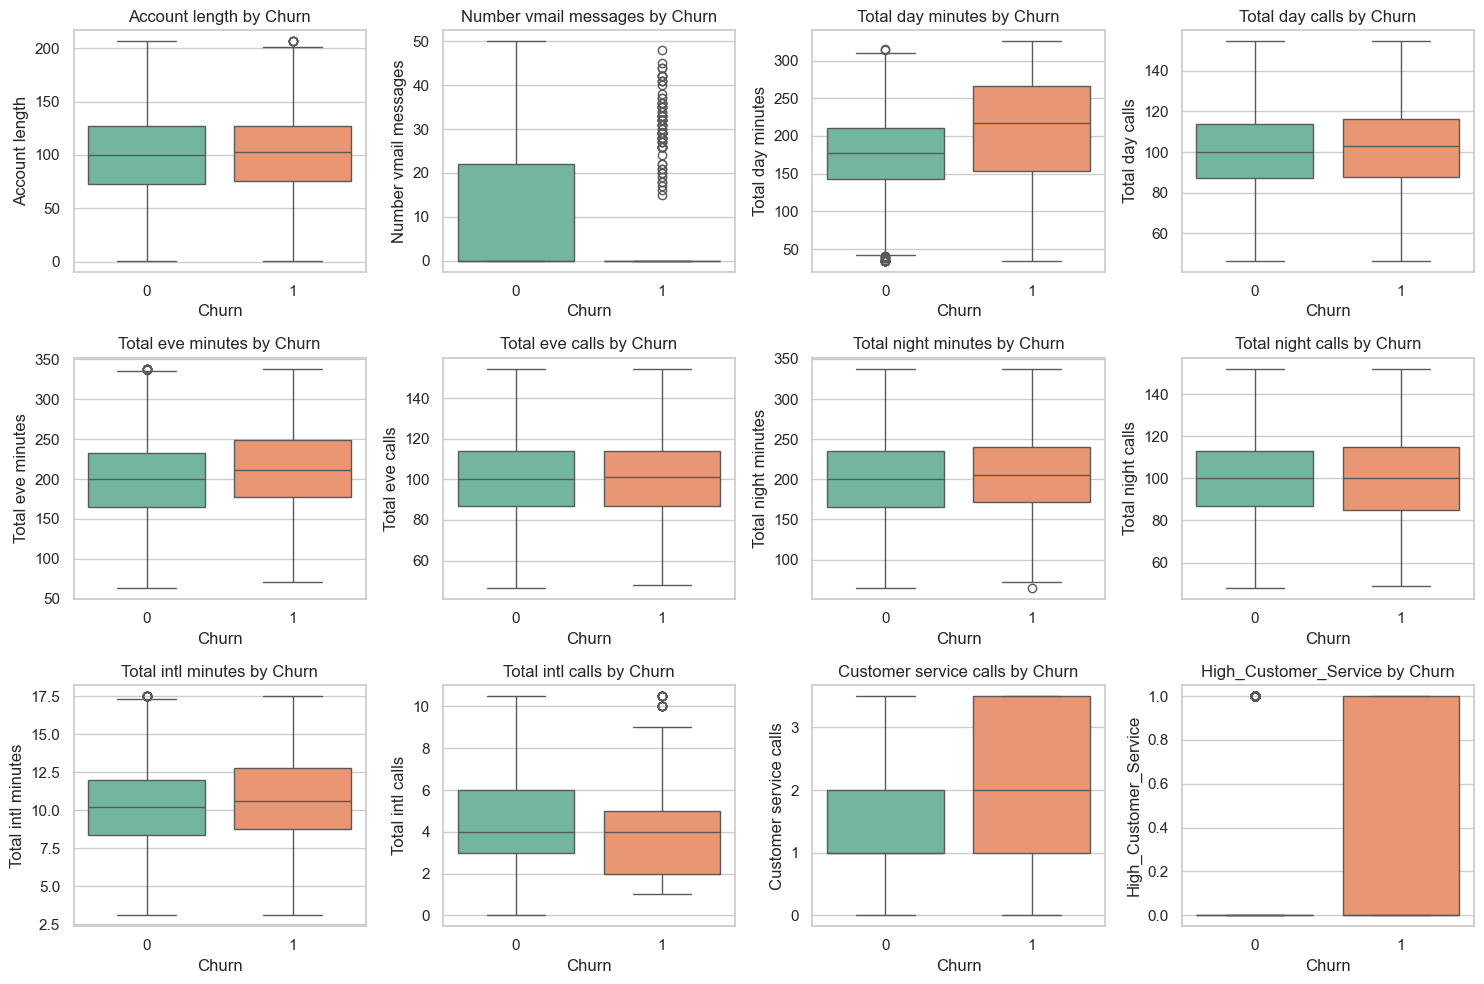

In [64]:
# 3. Boxplots by Churn
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x='Churn', y=col, data=df, palette='Set2')
    plt.title(f'{col} by Churn')
plt.tight_layout()
plt.savefig(f'../visualizations/enhanced/boxplots_by_churn.png')
plt.show()

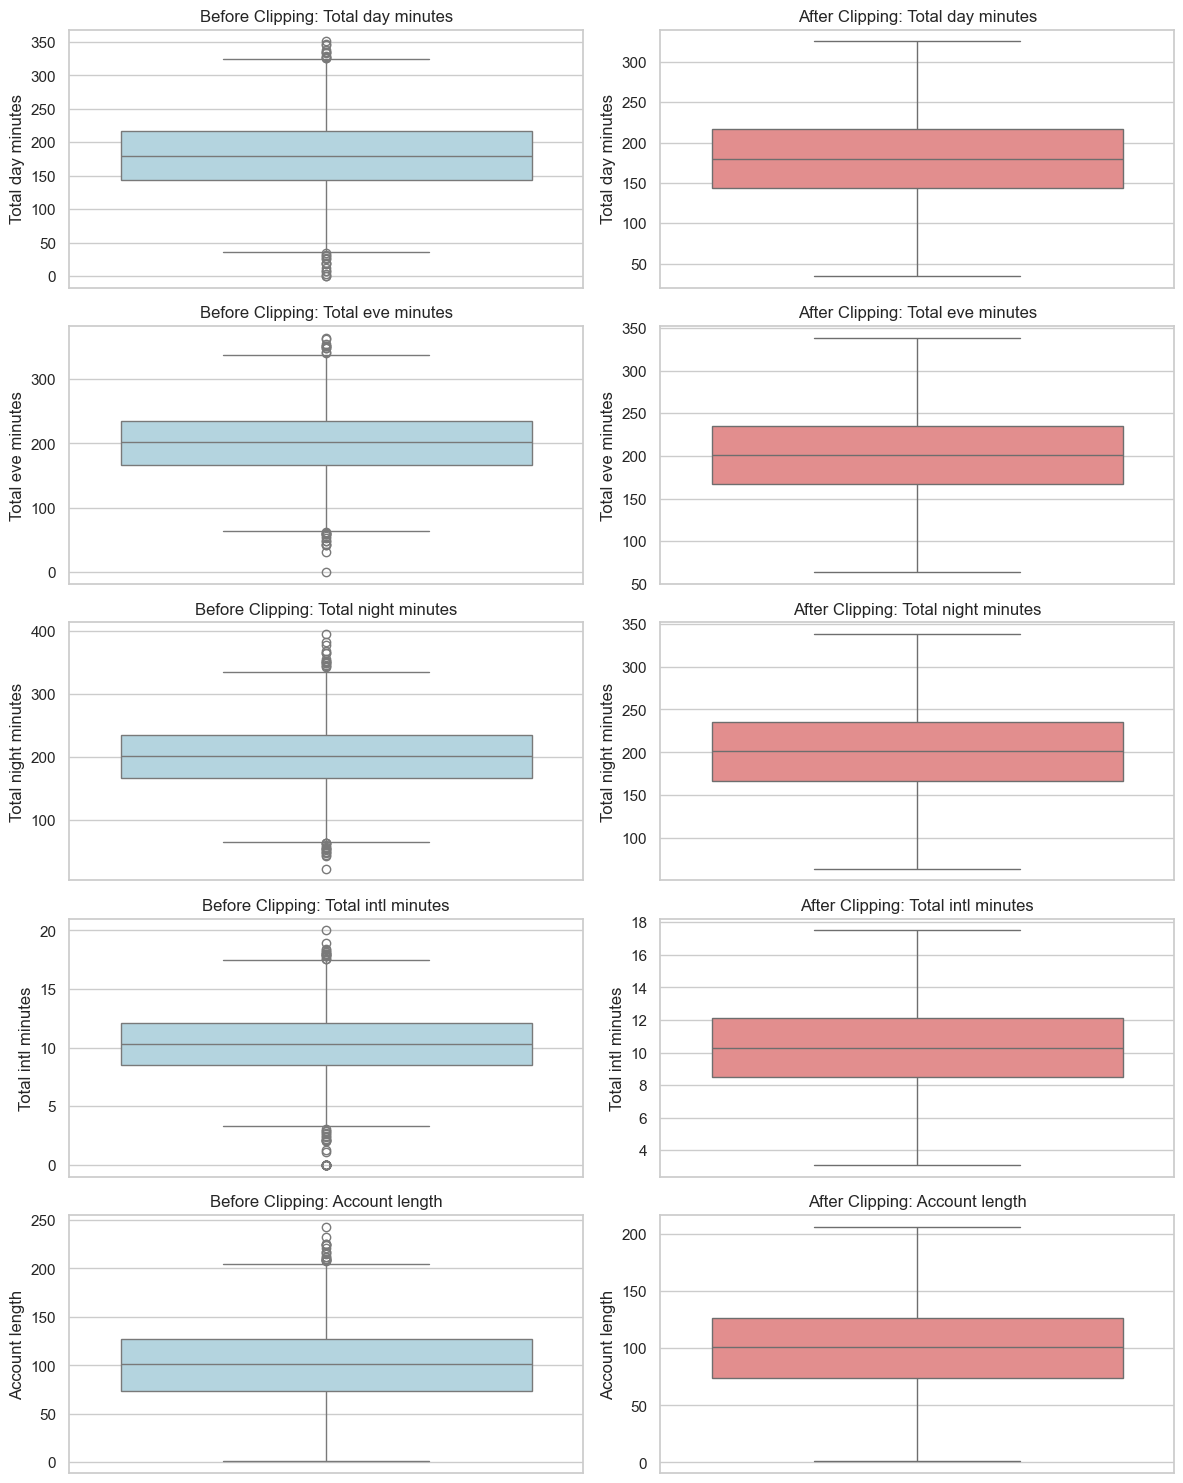

In [65]:
# 4. Side-by-Side Boxplots: Before vs. After Clipping
clipped_cols = [
    'Total day minutes', 'Total eve minutes',
    'Total night minutes', 'Total intl minutes',
    'Account length'
]

plt.figure(figsize=(12, len(clipped_cols) * 3))
for i, col in enumerate(clipped_cols, 1):
    plt.subplot(len(clipped_cols), 2, 2*i-1)
    sns.boxplot(y=df_before[col], color='lightblue')
    plt.title(f'Before Clipping: {col}')
    plt.subplot(len(clipped_cols), 2, 2*i)
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(f'After Clipping: {col}')
plt.tight_layout()
plt.savefig(f'../visualizations/enhanced/boxplots_before_after_clipping.png')
plt.show()

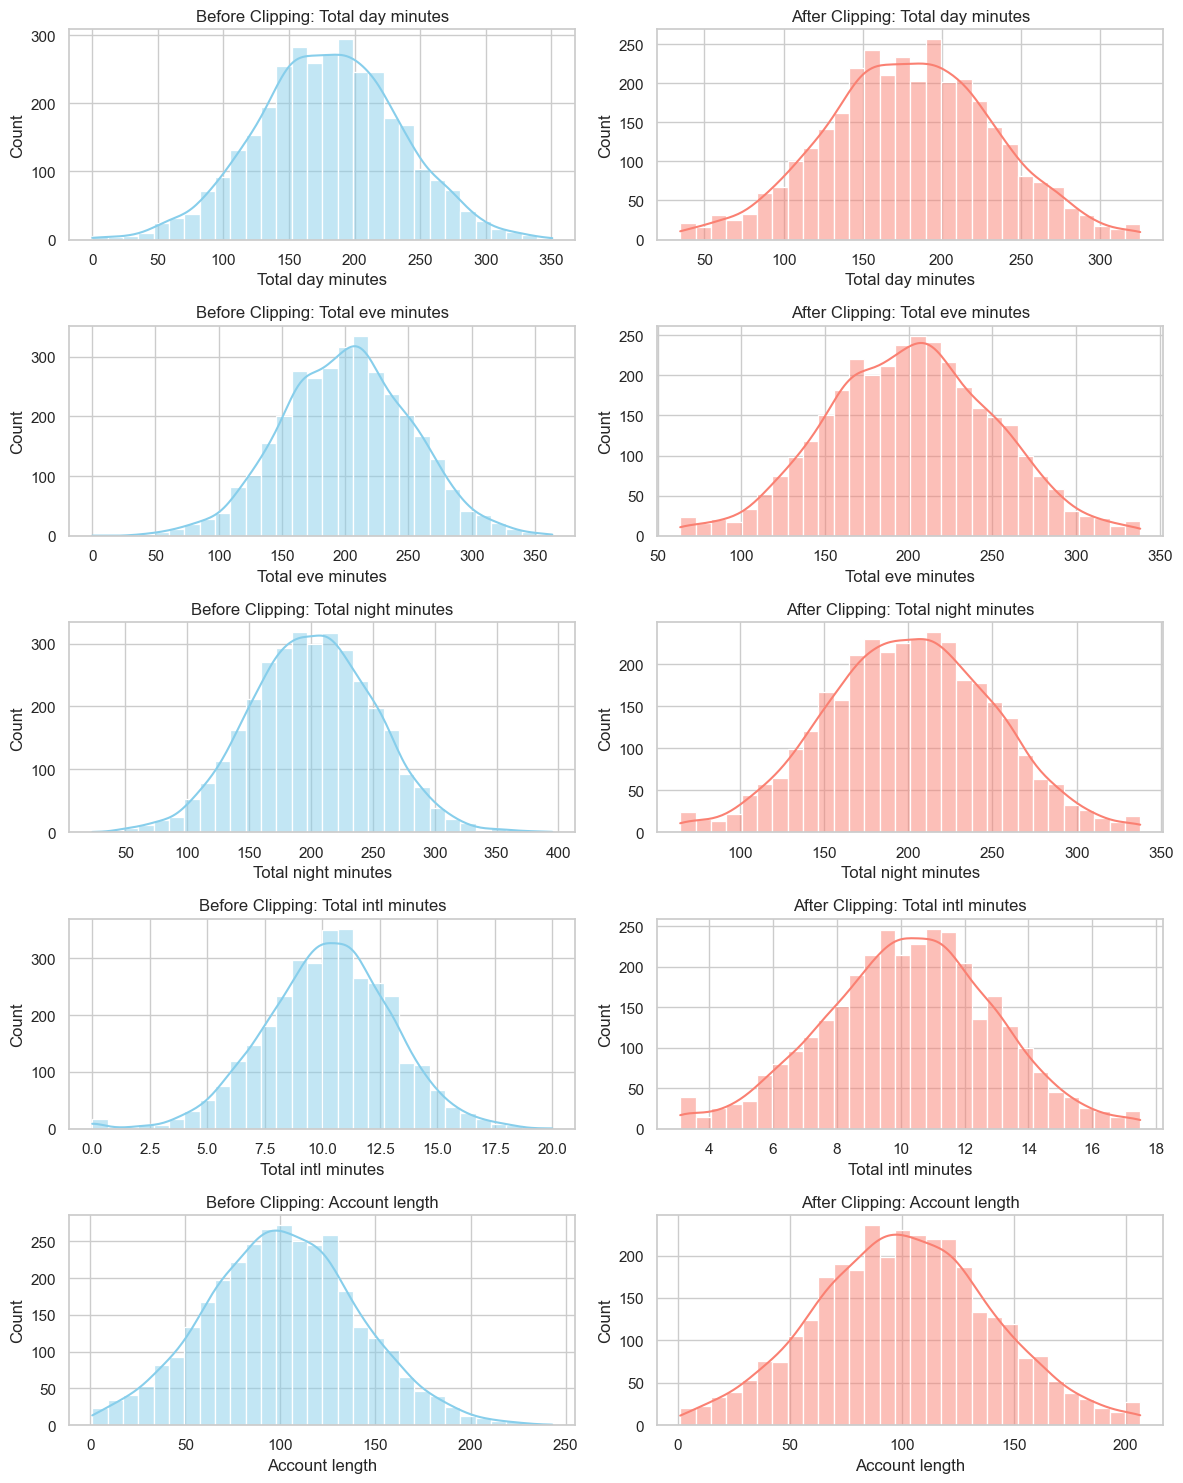

In [66]:
# 5. Side-by-Side Histograms: Before vs. After Clipping
plt.figure(figsize=(12, len(clipped_cols) * 3))
for i, col in enumerate(clipped_cols, 1):
    plt.subplot(len(clipped_cols), 2, 2*i-1)
    sns.histplot(df_before[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Before Clipping: {col}')
    plt.subplot(len(clipped_cols), 2, 2*i)
    sns.histplot(df[col], kde=True, bins=30, color='salmon')
    plt.title(f'After Clipping: {col}')
plt.tight_layout()
plt.savefig(f'../visualizations/enhanced/histograms_before_after_clipping.png')
plt.show()

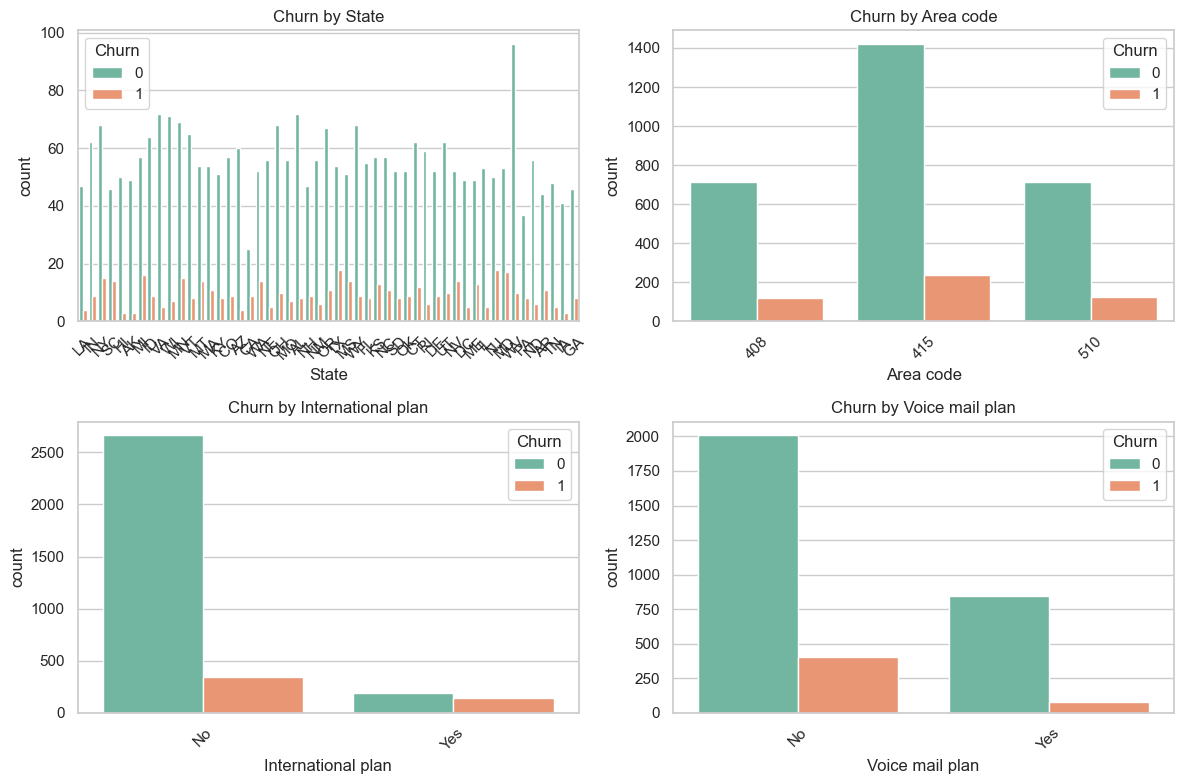

In [67]:
# 6. Categorical Variables vs. Churn
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, hue='Churn', data=df, palette='Set2')
    plt.title(f'Churn by {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'../visualizations/enhanced/categorical_columns_by_churn.png')
plt.show()

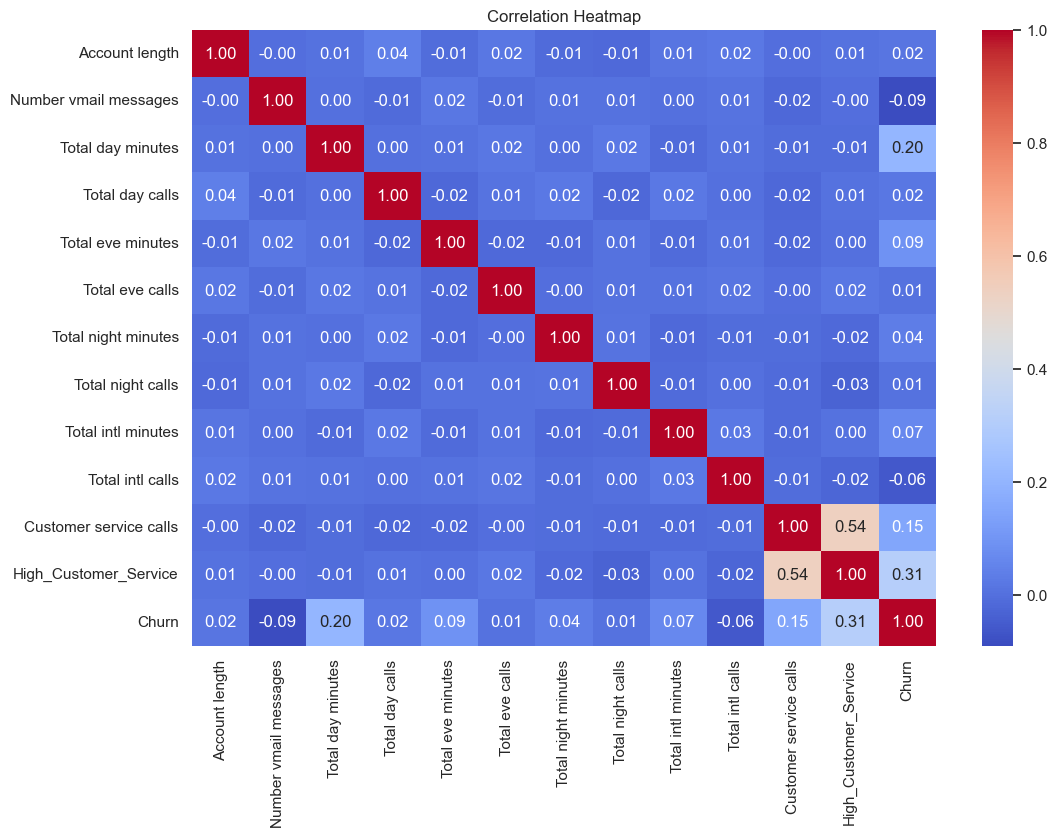

In [68]:
# 7. Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation = df[numeric_cols + ['Churn']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.savefig(f'../visualizations/enhanced/correlation_heatmap.png')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16252\3434641299.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_churn.values, y=state_churn.index, palette='Set2')


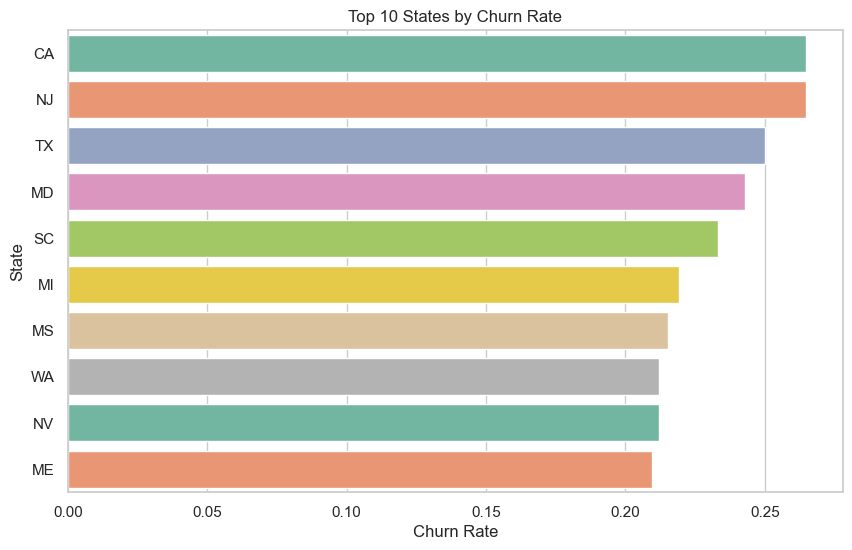

In [69]:
# 8. Churn Rate by State (Top 10 States by Count)
state_churn = df.groupby('State')['Churn'].mean().sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 6))
sns.barplot(x=state_churn.values, y=state_churn.index, palette='Set2')
plt.title('Top 10 States by Churn Rate')
plt.xlabel('Churn Rate')
plt.savefig(f'../visualizations/enhanced/top_10_states_by_churn_rate.png')
plt.show()

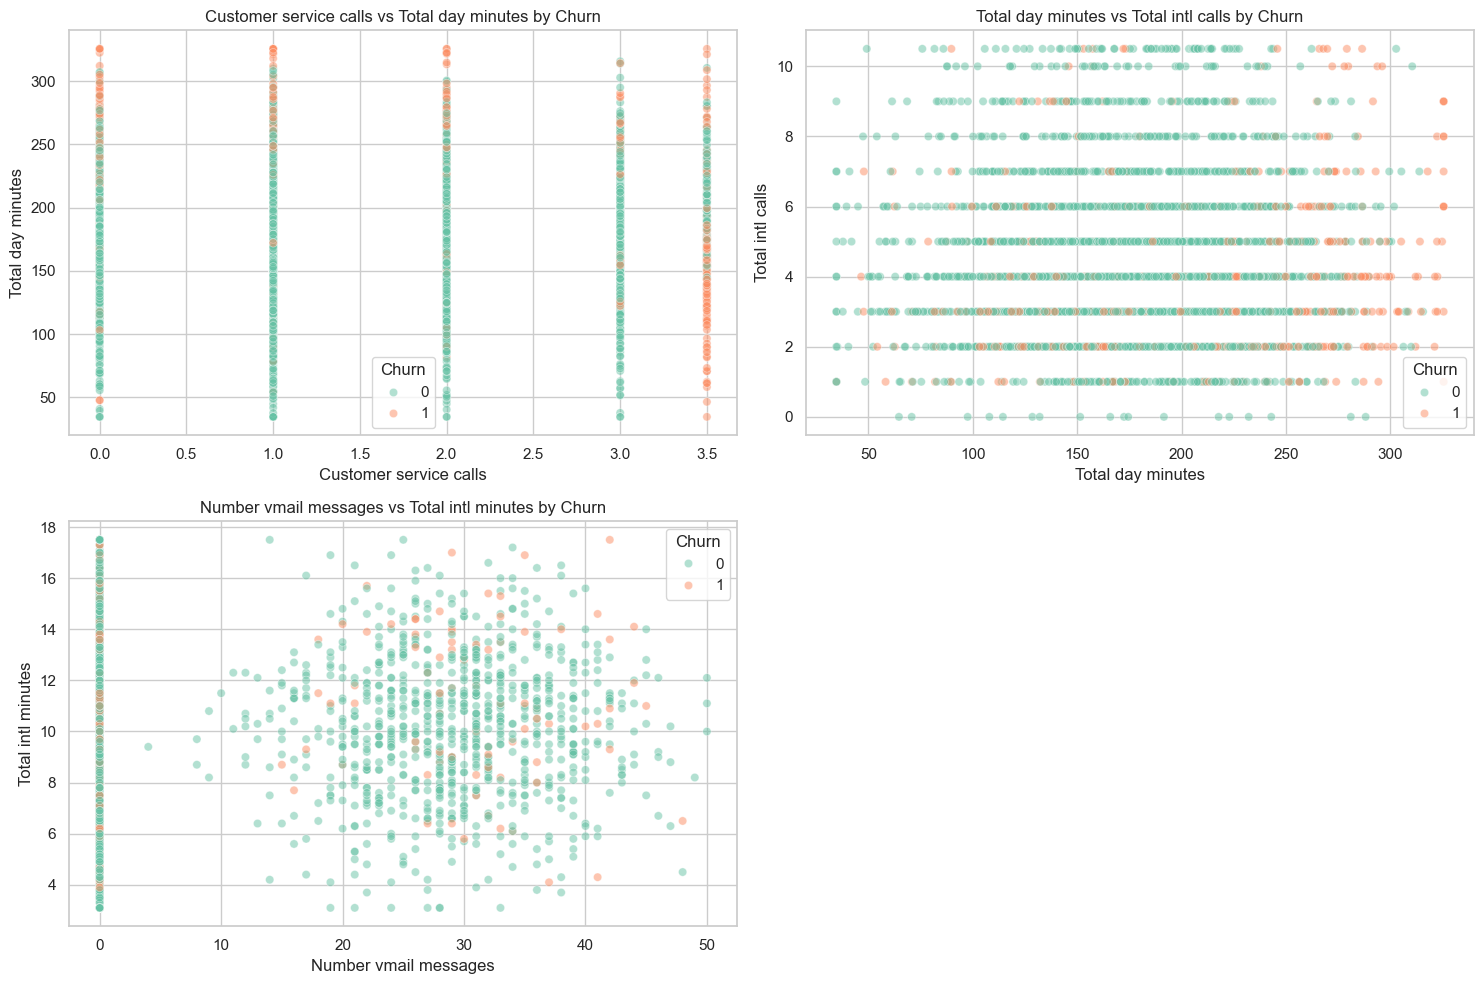

In [70]:
# Define key feature pairs based on domain knowledge 
scatter_pairs = [
    ('Customer service calls', 'Total day minutes'),
    ('Total day minutes', 'Total intl calls'),
    ('Number vmail messages', 'Total intl minutes')
]

# Create scatter plots for key feature pairs
plt.figure(figsize=(15, 10))
n_cols = 2
n_rows = int(np.ceil(len(scatter_pairs) / n_cols))

for i, (x_col, y_col) in enumerate(scatter_pairs, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(data=df, x=x_col, y=y_col, hue='Churn', palette='Set2', alpha=0.5)
    plt.title(f'{x_col} vs {y_col} by Churn')

plt.tight_layout()
output_dir = "../visualizations/enhanced"
os.makedirs(output_dir, exist_ok=True)
plt.savefig(f'{output_dir}/scatter_plots_key_features.png')
plt.show()